In [547]:
import pandas as pd
import warnings
warnings.filterwarnings(action='ignore')

df = pd.read_csv('/content/vgames2.csv')

#Year칼럼의 결측치 제거
df = df.dropna(subset=['Year'])
#Year칼럼의 데이터를 int형으로 변환
df["Year"] = df["Year"].apply(lambda x : int(x)) 
#플랫폼 칼럼에서 2600(오염데이터)을 포함하는 갯수파악
Ans2 = df.loc[df.Platform.str.contains('2600')].shape
#플랫폼 칼럼에서 2600을 포함하고 1990년 이전에 나온 갯수파악
Ans1 = df.loc[(df.Platform.str.contains('2600'))& (df.Year <= 1990)].shape

print(Ans1,Ans2) #오염된 데이터가 있는 행이 30년이 지난 오래된 게임이므로 삭제한다.

#오염된 데이터 삭제
sample = df[df['Platform'] == '2600'].index
df = df.drop(sample)

(116, 10) (116, 10)


In [548]:
#sales에 K,M 처리
def km(x):
  if 'K' in x:
    x = x.replace('K','')
    x = float(x)*1/1000

  x = str(x).replace('M','')
  x = float(x)
  return x
   
df['NA_Sales'] = df['NA_Sales'].apply(km)
df['EU_Sales'] = df['EU_Sales'].apply(km)
df['JP_Sales'] = df['JP_Sales'].apply(km)
df['Other_Sales'] = df['Other_Sales'].apply(km)

In [549]:
#첫번째 칼럼 삭제
df = df.drop(df.columns[0], axis=1)
#총 판매량 칼럼 생성
df['total_sales'] = df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales']

In [550]:
#두 자리 연도->네자리 연도
def year(x):
  if x<20:
    x = x + 2000
  elif x<100:
    x = x + 1900
  return x

df['Year'] = df['Year'].apply(year)

In [551]:
import numpy as np

#2000년대
Year_2000 = df.loc[(df.Year >= 2000)&(df.Year < 2010)]
#2010년대
Year_2010 = df.loc[(df.Year >= 2010)]
#2000년대 이후
Year_2000_ = df.loc[(df.Year >= 2000)]

#1980~2020년 별로 years 리스트에 삽입
years=[]
for i in range(1980,2021):
  years.append(df.loc[(df.Year == i)])

In [552]:
import matplotlib.pyplot as plt

#장르별 판매량 계산 함수
def sales(x):
 count = x.groupby('Genre').sum()
 #가장 많이 팔린 순서로 return
 count = count[['total_sales']].sort_values('total_sales',ascending=False)
 return count

#연도별 데이터를 sales함수에 대입
count=[]
for i in range(21,41):#2001~2020년
  count.append(sales(years[i]))

#count 데이터프레임을 전치-->그래프만들기 위해
a=[]
for i in range(20):
  a.append(np.transpose(count[i]))

In [553]:
#연도별 장르 판매량을 알기위해 행으로 쌓아줌(concat)
b=a[0]
for i in range(1,20):
 b=pd.concat([b, a[i]])
#결측치를 0으로 대체
b2 = b.fillna(0)
#y2에 2001~2021순으로 정렬
y2=np.arange(2001,2021)
#인덱스를 연도로 설정
b2.index=y2
#연도별 장르 판매량

In [554]:
#북미,유럽,일본의 연도별 판매량을 알아봄
df2 = Year_2000_[['Genre','EU_Sales','Year']]
pp=df2.groupby('Year').sum().sort_values('Year',ascending=False)
# a = pp[pp['NA_Sales'] == 0].index
# pp = pp.drop(a)

#장르별 판매량을 알기 위한 함수
def cc(x):
  Ans = df2.loc[df2.Year == x]
  Ans = Ans.groupby('Genre').sum()
  #Year칼럼은 필요없어 제거
  Ans = Ans.drop(['Year'],axis=1)
  return Ans

c=[]

#2000~2021년까지 계산
for i in range(2000,2021):
  c.append(cc(i))

#count 데이터프레임을 전치-->그래프만들기 위해
d=[]
for i in range(21):
  d.append(np.transpose(c[i]))

#연도별 장르 판매량을 알기위해 행으로 쌓아줌(concat)
e=d[0]
for i in range(1,21):
 e=pd.concat([e, d[i]])
e=e.fillna(0)
#y2에 2001~2021순으로 정렬
y3=np.arange(2000,2021)
#인덱스를 연도로 설정
e.index=y3
# df2.loc[df2['Platform']=='N64'].sort_values('Year')

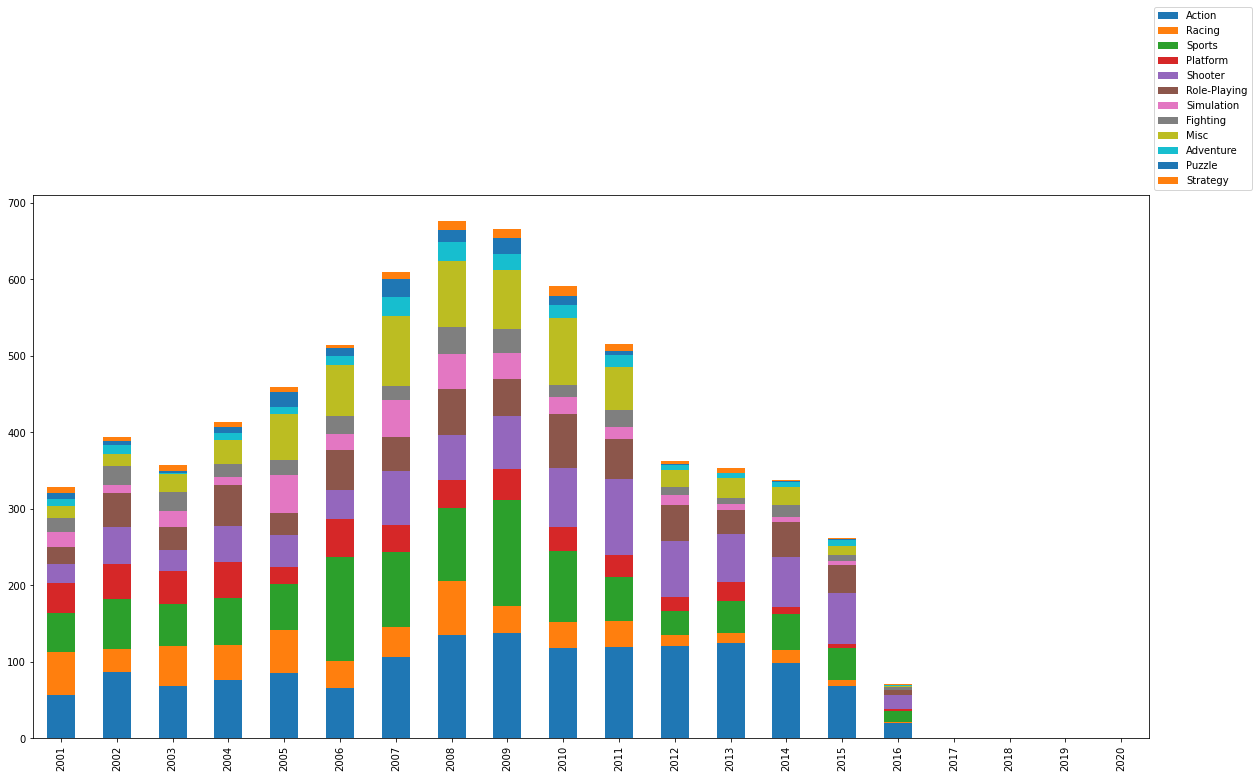

In [555]:
#연도별 지역 판매량
b2.plot(kind="bar",stacked=True,figsize=(20,10))
plt.legend(loc="lower left",bbox_to_anchor=(1.0,1.0))
plt.show()

In [556]:
year = Year_2000_.groupby('Genre').sum().sort_values('NA_Sales',ascending=False)
yy=year[['NA_Sales']]

year.shape
# fig = plt.figure(figsize=(10, 10))
# plt.pie(yy['NA_Sales'].values*10,
#         labels=yy['NA_Sales'].index,  
#         autopct='%1.2f%%', 
#         startangle=90,
#         textprops={'fontsize': 14}) 

# plt.axis('equal')
# plt.show()

(12, 6)

In [409]:
import scipy.stats as stats

# df2 = df.sort_values('total_sales')
# y1 = stats.norm(0, 1).pdf(df2['total_sales'])        

# plt.figure(figsize=(5, 3))          # 플롯 사이즈 지정
# plt.plot(df2['total_sales'], y1, color="red")         # 선을 빨강색으로 지정하여 plot 작성          
# plt.xlabel("x")                      # x축 레이블 지정
# plt.ylabel("y")                      # y축 레이블 지정
# plt.xlim(0, 4)
# plt.grid()                           # 플롯에 격자 보이기
# plt.title("Normal Distribution with scipy.stats")     # 타이틀 표시
# plt.legend(["N(0, 1)"])              # 범례 표시
# plt.show()                           # 플롯 보이기

In [557]:
X1=np.arange(0,24,2)
X2 = X1 + 0.5
X3 = X2 + 0.5

([<matplotlib.axis.XTick at 0x7f6917621650>,
 [Text(0, 0, 'Action'),
  Text(0, 0, 'Sports'),
  Text(0, 0, 'Shooter'),
  Text(0, 0, 'Misc'),
  Text(0, 0, 'Role-Playing'),
  Text(0, 0, 'Racing'),
  Text(0, 0, 'Platform'),
  Text(0, 0, 'Simulation'),
  Text(0, 0, 'Fighting'),
  Text(0, 0, 'Adventure'),
  Text(0, 0, 'Puzzle'),
  Text(0, 0, 'Strategy')])

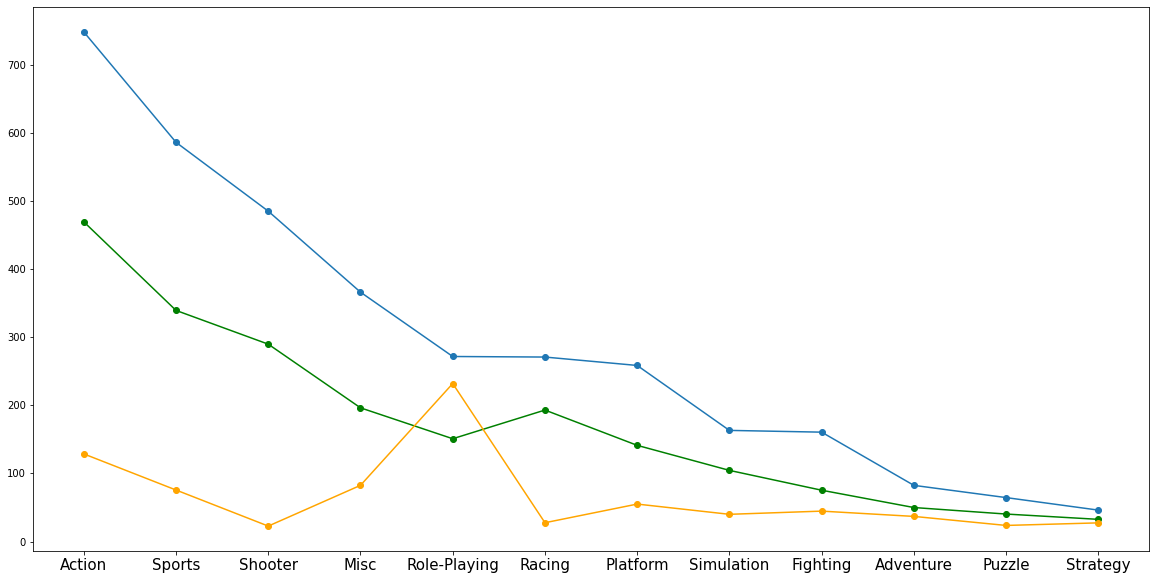

In [558]:
plt.figure(figsize=(20,10))
X1=[1,3,5,7,9,11,13,15,17,19,21,23]

# plt.bar(X1, year['NA_Sales'],width=0.5)
# plt.bar(X2, year['EU_Sales'],color='g',width=0.5)
# plt.bar(X3, year['JP_Sales'],color='orange',width=0.5)

plt.plot(X2, year['NA_Sales'],linestyle='-', marker='o')
plt.plot(X2, year['EU_Sales'],color='g',linestyle='-', marker='o')
plt.plot(X2, year['JP_Sales'],color='orange',linestyle='-', marker='o')
# plt.plot(X2, year['total_sales'],color='r',linestyle='--', marker='o')

plt.xticks(X2, year.index, fontsize=15)

# plt.show()
# Ans4.plot(x="Genre", y=["NA_Sales", "EU_Sales", "JP_Sales"], kind="bar",figsize=(20,10))
# plt.show()

# df3 = pd.DataFrame({'NA_Sales': Ans3.NA_Sales,
#                    'EU_Sales': Ans3.EU_Sales,
#                    'JP_Sales': Ans3.JP_Sales}, index=Ans3.index)
# ax = df3.plot.bar(rot=0)